In [1]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,f1_score,precision_score,accuracy_score,classification_report,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dense, Dropout

In [2]:
#load the dataset
df = pd.read_csv('smartattack_14users_alltasks_random_foldcauchy-integralvalues.csv', index_col=False,low_memory=False)

In [3]:
df_benign = df[df.Label_Desc == 'Benign type']
df_attack = df[df.Label_Desc == 'Malicious type']


In [4]:
# shuffle the dataset and eliminate the null values
dataset = shuffle(df,random_state=0)
dataset = dataset.replace(np.nan, 0)

# Generating the matrices of the features(X) and Generating Dependent Variable Vector(Y)
x = dataset.iloc[:,1:-3].values
y = dataset['Label_code'].values

In [5]:
# Splitting datset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =0)

In [6]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
t=pd.DataFrame(x_train)

(131349, 29) (131349, 29) (197883,)


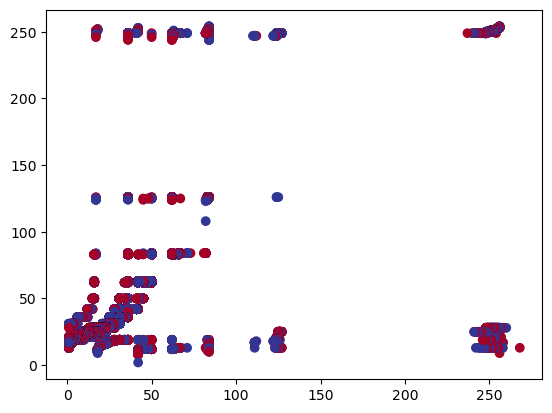

In [7]:
x_benign=df_benign.iloc[:131349,1:-3].values
x_attack=df_attack.iloc[:131349,1:-3].values
yScatter_train=y[:131349]
print(x_benign.shape,x_attack.shape,y_train.shape)
plt.scatter(x_benign[:,14],x_attack[:,14], c = yScatter_train, cmap = plt.cm.RdYlBu)

In [8]:
#Creating the neural network
#Initialising ANN
ann = tf.keras.Sequential()
#Adding input layer
ann.add(tf.keras.layers.Dense(units=29,input_dim=29, activation="relu",kernel_initializer=tf.keras.initializers.HeNormal()))
#Adding hidden layer
ann.add(tf.keras.layers.Dense(units=64, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
ann.add(tf.keras.layers.Dense(units=64, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
ann.add(tf.keras.layers.Dense(units=64, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid',kernel_initializer=tf.keras.initializers.HeNormal()))

In [9]:
# Compile the model and calculate its accuracy
ann.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])

In [10]:
# train the neural network
ann.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
6184/6184 [==============================] - 13s 2ms/step - loss: 0.6185 - accuracy: 0.6383
Epoch 2/3
6184/6184 [==============================] - 13s 2ms/step - loss: 0.5982 - accuracy: 0.6524
Epoch 3/3
6184/6184 [==============================] - 11s 2ms/step - loss: 0.5966 - accuracy: 0.6523


In [11]:
# Evaluate the model on the test data
test_loss, test_accuracy = ann.evaluate(x_test, y_test, verbose=0)

In [12]:
# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 64.92%


In [13]:
# Function to calculate feature importance scores
def calculate_permutation_importance(model, x, y, metric=accuracy_score, num_rounds=3):
    baseline = metric(y, np.round(model.predict(x)))
    importance_scores = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        scores = []
        for _ in range(num_rounds):
            x_permuted = x.copy()
            x_permuted[:, i] = np.random.permutation(x[:, i])
            score = metric(y, np.round(model.predict(x_permuted)))
            scores.append(score)
        importance_scores[i] = baseline - np.mean(scores)
    return importance_scores

# Calculate feature importance scores
importance_scores = calculate_permutation_importance(ann, x_test, y_test)

2062/2062 [==============================] - 3s 1ms/step


In [14]:
# Display feature importance scores
for i, score in enumerate(importance_scores):
    feature_name = df.columns[i]
    print(f"{feature_name}: {score}")

Unnamed: 0: 0.002147733761869386
fl_dur: 0.0
tot_fw_pk: 0.0
tot_bw_pk: 0.0
tot_l_fw_pkt: 0.0
fw_pkt_l_max: 0.0
fw_pkt_l_min: 0.0
fw_pkt_l_avg: 0.0
fw_pkt_l_std: 0.0
bw_pkt_l_max: 0.0
bw_pkt_l_min: 0.0
bw_pkt_l_mean: 0.0
bw_pkt_l_std: 0.01289650955362509
fw_fl_byt_s: 0.01082457815982174
bw_fl_byt_s: 0.0023599803924541085
fw_fl_pkt_s: 0.013012739851326338
bw_fl_pkt_s: 0.0004194397699650576
fw_iat_tot: 0.005963119621190338
fw_iat_avg: 0.0
fw_iat_std: 0.005695284587357241
fw_iat_max: 0.0036637811231889916
fw_iat_min: 0.0003133164546726963
bw_iat_tot: 0.005407235588706483
bw_iat_avg: 0.0
bw_iat_std: 0.004578463031185143
bw_iat_max: 0.005988387077212387
bw_iat_min: 0.008570721082659993
fw_pkt_s: 0.033120581353628276
bw_pkt_s: 0.0
